# Create CartPole environment

In [17]:
# Import the gym Library
import gym

# Create the environment using gym.make(env_name)
env = gym.make('CartPole-v1')

"""
Analyze the action space of cart pole using the property action_space
"""
print("Action Space:", env.action_space)

"""
Analyze the observation space of cartpole using the property observation_space
"""
print("Observation Space:", env.observation_space)

Action Space: Discrete(2)
Observation Space: Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


The two discrete actions are Go Left (0) and Go Right (1).<br> The (4,) means that it is a 4 dimensional box, subset of $\mathbb{R}^n$.<br> The forms of each interval in the Box space can be one of $[a,b],(-\infty,b],[a,+\infty),(-\infty,+\infty)$.
> **Note:**<br> The square brackets indicate bounded values, and the parenthsis indicate unbounded values.
## Inspect the observation space

In [18]:
# Analyze the bounds of the observation space
print("Lower bound of the Observation Space:", env.observation_space.low)
print("Upper bound of the Observation Space:", env.observation_space.high)

Lower bound of the Observation Space: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Upper bound of the Observation Space: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


From left to right, these represent the cart position, velocity, pole angle in rads, and angular velocity.

## GYM SPACES
Create a simple space and sample it:

In [19]:
# Type hinting
from typing import Tuple
#import gym 

# Import the spaces module
from gym import spaces

# Create a discrete space composed by N-elements (5)
n: int = 5
    
discrete_space = spaces.Discrete(n=n)

# Sample from the space using .sample method
print("Discrete Space Sample:", discrete_space.sample())

"""
Create a Box space with a shape of (4, 4)
Upper and lower Bound are 0 and 1
"""

box_shape: Tuple[int, int] = (4, 4)
box_space = spaces.Box(low=0, high=1, shape=box_shape)

# Sample from the space using .sample method
print("Box Space Sample:", box_space.sample())

Discrete Space Sample: 1
Box Space Sample: [[0.4035469  0.10153545 0.96714556 0.7341427 ]
 [0.2786235  0.9061755  0.14851627 0.72153705]
 [0.18769847 0.6230954  0.90203226 0.5497883 ]
 [0.8464228  0.4081887  0.740756   0.02547262]]


This is a random sample of the $4^{th}$ element from the discrete space composed of 5 elements (0 to 4). The result is a 4x4 matrix bounded between 0 and 1.

The sample can be seeded for reproducibility.

In [20]:
# Seed spaces to obtain reproducible samples
discrete_space.seed(0)
box_space.seed(0)

# Sample from the space using .sample method
print("Discrete Space (seed=0) Sample:", discrete_space.sample())

# Sample from the space using .sample method
print("Box Space (seed=0) Sample:", box_space.sample())

Discrete Space (seed=0) Sample: 0
Box Space (seed=0) Sample: [[0.05436005 0.9653909  0.63269097 0.29001734]
 [0.10248426 0.67307633 0.39257675 0.66984606]
 [0.05983897 0.52698725 0.04029069 0.9779441 ]
 [0.46293673 0.6296479  0.9470484  0.6992778 ]]


### Creating A Space For Image Observations
Create a space representing RGB images with dimensions equal to 256 x 256.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np # used for the dtype of the space

"""
since the Space is RGB images with shape 256x256 the final shape is (256, 256, 3)
"""
shape = (256, 256, 3)

# If we consider uint8 images the bounds are 0-255
low = 0
high = 255

# Space type: unsigned int
dtype = np.uint8

# Create the space
space = spaces.Box(low=low, high=high, shape=shape, dtype=dtype)

# Print space representation
print("Space", space) # prints WxHxC

# Sample from the space
sample = space.sample()
print("Space Sample", sample)

Space Box(0, 255, (256, 256, 3), uint8)
Space Sample [[[140  37 252]
  [ 32   9  89]
  [ 71 188  99]
  ...
  [231 187 150]
  [209  31  55]
  [ 47 148  35]]

 [[ 25 229 121]
  [206 141  53]
  [121   1 144]
  ...
  [ 37 159 170]
  [233 176 132]
  [102  65 224]]

 [[ 64  97 146]
  [114  32 222]
  [160  10 220]
  ...
  [ 10 221 216]
  [214 162 220]
  [142 155 240]]

 ...

 [[159  69  52]
  [242  96 118]
  [ 62 175 107]
  ...
  [ 76 115   4]
  [  9  50 106]
  [217  17  60]]

 [[105 225 247]
  [115 137 136]
  [173  46 252]
  ...
  [121 114 174]
  [162 127 252]
  [140 218  57]]

 [[ 63  26  72]
  [193 130  27]
  [ 75  65 230]
  ...
  [ 74  65 162]
  [218 103 100]
  [119 227  46]]]


#### Visualize the retruned sample

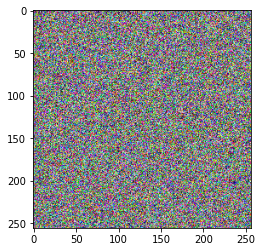

In [22]:
plt.imshow(sample)

### Add temporal component
Allow the agent to see the last **n** frames. This leads to a state representation of 4 dimensions. TxWxHxC is the result.

In [23]:
# We want a space representint the last n=4 frames
n_frames = 4 # number of frames
width = 256 # image width
height = 256 # image height
channels = 3 # number of channels (RGB)
shape_temporal = (n_frames, width, height, channels)
# create a new instance of space
space_temporal = spaces.Box(low=low, high=high, shape=shape_temporal, dtype=dtype)

print("Space with temporal component", space_temporal)

Space with temporal component Box(0, 255, (4, 256, 256, 3), uint8)


## Render The Environment

In [24]:
import time
env = gym.make("CartPole-v1")

# Reset the envirenment (mandatory)
env.reset()

# render the environment for 100 steps
n_steps = 1000
for i in range(n_steps):
    env.render()    
    action = env.action_space.sample()
    obs, rew, done, info = env.step(action)
    
# Had to change things up some. Need to reset the environment if "done". https://github.com/openai/gym/issues/1116
    if done:
        env.reset()
        time.sleep(0.1)
    
# Close the environment correctly
env.close()

### Implementing The Reinforcement Learning Loop with GYM

In [25]:
# each episode is composed by 200 timesteps
# define 10 episodes
n_episodes = 10
n_timesteps = 200
timestep_count = []

# loop for the episodes
for episode_number in range(n_episodes):
    # here we are inside an episode
    """
    the reset function resets the environment and returns
    the first environment observation
    """
    observation = env.reset()
    
    """
    loop for the given number of timesteps or
    until the episode is teminated
    """
    for timestep_number in range(n_timesteps):
        # render the environment
        env.render(mode="rgb-array")
        
        # select the action
        action = env.action_space.sample()
        
        # apply the selected action by calling env.step
        observaton, reward, done, info = env.step(action)
        
        """
        if done the episode is terminated, we have to reset
        the environment
        """
        if done:
            timestep_count.append(timestep_number)
            print(f"Episode Number: {episode_number}, Timesteps: {timestep_number}")
            # break from the timestep loop
            break
            
    # close the environment
    env.close()

print(f"\nThe average timesteps per Episode is: {np.array(timestep_count).mean()}")

Episode Number: 0, Timesteps: 15
Episode Number: 1, Timesteps: 20
Episode Number: 2, Timesteps: 18
Episode Number: 3, Timesteps: 10
Episode Number: 4, Timesteps: 11
Episode Number: 5, Timesteps: 14
Episode Number: 6, Timesteps: 17
Episode Number: 7, Timesteps: 19
Episode Number: 8, Timesteps: 11
Episode Number: 9, Timesteps: 9

The average timesteps per Episode is: 14.4


TNotice the average number of timesteps using the random policy. The average will change each time that the code is run.

## Activity 1.01: Measuring Performance of a Random Agent
1. Define an abstract **Agent** class containing a **pi()** method to represent the policy. The method takes as input the environment state. The __init__ method takes the action state and builds the distribution.
2. Define a **ContinousAgent** derived from the abstract class that:
  * Checks that the action space is continuous.
  * Initialize a probability distribution type acccording to that defined by GYM spaces.
3. Define a **DiscreteAgent** derived from the abstract class that initializes a uniform distribution.
4. Implement the **pi()** method for both agents.
5. Deefine the main RL Loopin another file by importing the agent.
6. Instantiate the agent according to the environment.
7. Take actions according to the **pi** function of the agent.
8. Measure the performance of the agent.
  * Collect the discounted return from each episode in a list or numpy array
  * Obtain the avg and std.
  
  ### Define The Abstract Agent Class

In [26]:
import abc

"""
Abstract class representing the agent
Init with the action space and the function pi returning the action
"""


class Agent:
    def __init__(self, action_space: gym.spaces.Space):
        """
        Constructor of the agent class.
        
        Args:
            action_space (gym.spaces.Space): environment action space
        """
        raise NotImplementedError("This class cannot be instantiated.")

    @abc.abstractmethod
    def pi(self, state: np.ndarray) -> np.ndarray:
        """
        Agent's policy.
        
        Args:
            state (np.ndarray): environment state
        
        Returns:
            The selected action
        """
        pass
    
    

### Define the Continuous Agent

In [27]:
class ContinuousAgent(Agent):
    def __init__(self, action_space: gym.spaces.Space, seed=46):
        # setup seed
        np.random.seed(seed)
        # check the action space type
        if not isinstance(action_space, gym.spaces.Box):
            raise ValueError("This is a Continuous Agent pass as input a Box Space.")

        # initialize the distribution according to the action space type
        if (action_space.low == -np.inf) and (action_space.high == np.inf):
            # the distribution is a normal distribution
            self._pi = lambda: np.random.normal(loc=0, scale=1, size=action_space.shape)
            return
        if (action_space.low != -np.inf) and (action_space.high != np.inf):
            # the distribution is a uniform distribution
            self._pi = lambda: np.random.uniform(
                low=action_space.low, high=action_space.high, size=action_space.shape
            )
            return
        if action_space.low == -np.inf:
            # negative exponential distribution
            self._pi = (
                lambda: -np.random.exponential(size=action_space.shape)
                + action_space.high
            )
            return
        if action_space.high == np.inf:
            # exponential distribution
            self._pi = (
                lambda: np.random.exponential(size=action_space.shape)
                + action_space.low
            )
            return

    def pi(self, observation: np.ndarray) -> np.ndarray:
        """
        Policy: simply call the internal _pi().
        
        This is a random agent so the action is independent from the observation.
        For real agents the action depends on the observation.
        """
        return self._pi()

### Define the Discrete Agent

In [28]:
class DiscreteAgent(Agent):
    def __init__(self, action_space: gym.spaces.Space, seed=46):
        # setup seed
        np.random.seed(seed)
        # check the action space type
        if not isinstance(action_space, gym.spaces.Discrete):
            raise ValueError("This is a Discrete Agent pass as input a Discrete Space.")

        # initialize the distribution according to the action space n attribute
        # the distribution is a uniform distribution
        self._pi = lambda: np.random.randint(low=0, high=action_space.n)

    def pi(self, observation: np.ndarray) -> np.ndarray:
        """
        Policy: simply call the internal _pi().
        
        This is a random agent so the action is independent from the observation.
        For real agents the action depends on the observation.
        """
        return self._pi()

### Define the make_agent function
This function takes as input an action_space and instantiates the corresponding agent based on space type.

In [29]:
def make_agent(action_space: gym.spaces.Space, seed=46):
    """
    Returns the correct agent based on the action space type
    """
    if isinstance(action_space, gym.spaces.Discrete):
        return DiscreteAgent(action_space, seed)
    if isinstance(action_space, gym.spaces.Box):
        return ContinuousAgent(action_space, seed)
    raise ValueError(
        "Only Box spaces or Discrete Spaces are allowed, check the action space of the environment"
    )

### Initiate some variables

In [30]:
# Environment Name
env_name = "CartPole-v0"
# Number of episodes
episodes = 10
# Number of Timesteps of each episodes
timesteps = 100
# Discount factor
gamma = 1.0
# seed environment
seed = 46

### Run the episodes
For each episode, update the cumulative rewards of each step by applying the discount factor. At the end of each episode, append the cumultive reward to the episode_returns list. After all episodes have run, get the mean and std. from the list and calculate the variance and return the values.

In [42]:
# Needed to show the environment in a notebook
from gym import wrappers

env = gym.make(env_name)
env.seed(seed)
# the last argument is needed to record all episodes
# otherwise gym would record only some of them
# The monitor saves the episodes inside the folder ./gym-results
env = wrappers.Monitor(
    env, "./gym-results", force=True, video_callable=lambda episode_id: True
)

agent = make_agent(env.action_space, seed)

# list of returns
episode_returns = []

# loop for the episodes
for episode_number in range(episodes):
    # here we are inside an episode

    # reset cumulated gamma
    gamma_cum = 1

    # return of the current episode
    episode_return = 0

    # the reset function resets the environment and returns
    # the first environment observation
    observation = env.reset()

    # loop for the given number of timesteps or
    # until the episode is terminated
    for timestep_number in range(timesteps):

        # render the environment
        # env.render()

        # select the action
        action = agent.pi(observation)

        # apply the selected action by calling env.step
        observation, reward, done, info = env.step(action)

        # increment the return
        episode_return += reward * gamma_cum

        # update the value of cumulated discount factor
        gamma_cum = gamma_cum * gamma

        # if done the episode is terminated, we have to reset
        # the environment
        if done:
            print(
                f"Episode Number: {episode_number}, Timesteps: {timestep_number}, Return: {episode_return}"
            )
            # break from the timestep loop
            break

    episode_returns.append(episode_return)

# close the environment
env.close()

# Calculate return statistics
avg_return = np.mean(episode_returns)
std_return = np.std(episode_returns)
var_return = std_return ** 2  # variance is std^2

print(f"\nStatistics on Return: Average: {avg_return}, Variance: {var_return}")


Episode Number: 0, Timesteps: 27, Return: 28.0
Episode Number: 1, Timesteps: 9, Return: 10.0
Episode Number: 2, Timesteps: 13, Return: 14.0
Episode Number: 3, Timesteps: 16, Return: 17.0
Episode Number: 4, Timesteps: 31, Return: 32.0
Episode Number: 5, Timesteps: 10, Return: 11.0
Episode Number: 6, Timesteps: 14, Return: 15.0
Episode Number: 7, Timesteps: 11, Return: 12.0
Episode Number: 8, Timesteps: 10, Return: 11.0
Episode Number: 9, Timesteps: 30, Return: 31.0

Statistics on Return: Average: 18.1, Variance: 68.89000000000001


In [44]:
# Render the episodes
import io
import base64
from IPython.display import HTML, display

episodes_to_watch = 1
for episode in range(episodes_to_watch):
    video = io.open(
        f"./gym-results/openaigym.video.{env.file_infix}.video{episode:06d}.mp4", "r+b"
    ).read()
    encoded = base64.b64encode(video)
    display(
        HTML(
            data="""
        <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>""".format(
                encoded.decode("ascii")
            )
        )
    )